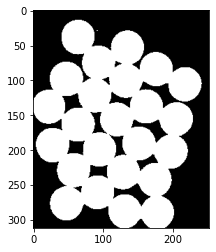

In [15]:
#函数： cv.watershed()
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img23 = cv.imread('../Images/img23.jpg')
gray = cv.cvtColor(img23,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh, 'gray')
plt.show()

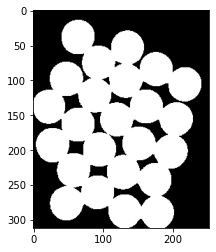

In [16]:
#去噪
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, 'gray')
plt.show()

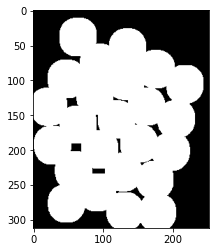

In [17]:
# 确定背景区域
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, 'gray')
plt.show()

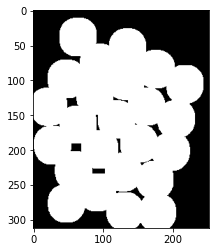

In [18]:
# 确定前景区域
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_bg, 'gray')
plt.show()

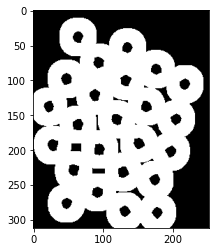

In [19]:
# 找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown, 'gray')
plt.show()

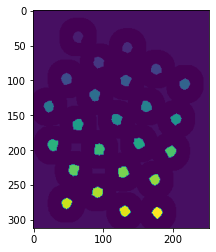

In [20]:
# 类别标记
ret, markers = cv.connectedComponents(sure_fg)
# 为所有的标记加1，保证背景是0而不是1
markers = markers+1
# 现在让所有的未知区域为0
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

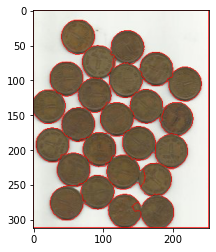

In [21]:
markers = cv.watershed(img23,markers) 
img23[markers == -1] = [0,0,255]

img23 = img23[:,:, ::-1]
plt.imshow(img23)
plt.show()
